In [2]:
from z3 import *
from IPython.display import Image

# Simple problems

## Solving linear equations

In [61]:
x = Real('x')
y = Real('y')
z = Real('z')
s = Solver()
s.add(3*x + 2*y - z == 1)
s.add(2*x - 2*y + 4*z == -2)
s.add(-x + 0.5*y - z == 0)
#s.add(-x + 0.5*y - z == 1)
print(s.check())
print(s.model())

sat
[y = -2, x = 1, z = -2]


## Calculator

In [62]:
s = Solver()
x,y,z = Ints('x y z')
s.add(x==2)
s.add(y==3)
s.add(z==x+y)
print(s.check())
print(s.model())

sat
[y = 3, z = 5, x = 2]


## Logical equivalence

In [67]:
x, y = Bools('x y')
s = Solver()
s.add( And(Or(x, Not(y)), Or(x,y)) )
s.check(), s.model()

(sat, [y = False, x = True])

In [68]:
x, y = Bools('x y')
a = Implies(x,y)
b = Or(y, Not(x))
prove( a == b )

proved


In [69]:
c = Implies(y,x)
prove( a == c )

counterexample
[y = True, x = False]


In [71]:
s = Solver()
s.add( a != c)
s.check()
s.model()

[y = True, x = False]

## We can use quantifiers!

In [72]:
s = Solver()
x, y = Ints('x y')

f = ForAll(x, Exists(y, x == y + 1))
s.add(f)

if s.check() == sat:
    print("Satisfiable")
    print(s.model())
else:
    print("Not satisfiable")

Satisfiable
[]


In [73]:
s = Solver()

x, y = Ints('x y')

g = Exists(x, ForAll(y, x == y + 1))

s.add(g)

if s.check() == sat:
    print("Satisfiable")
    print(s.model())
else:
    print("Not satisfiable")

Not satisfiable


In [78]:
s = Solver()

x, y = Ints('x y')

h = Exists(x, x**2 == y) 

s.add(y>10)
s.add(h)

if s.check() == sat:
    print("Satisfiable")
    print(s.model())
else:
    print("Not satisfiable")

Satisfiable
[y = 25]


In [46]:
s = Solver()

x, y = Ints('x y')

hh = ForAll(x, Implies(x>0, x>y)) 

s.add(hh)

if s.check() == sat:
    print("Satisfiable")
    print(s.model())
else:
    print("Not satisfiable")

Satisfiable
[y = 0]


Be mindful of where conditions apply (free vs. bound variables): 

In [47]:
s = Solver()

x, y = Ints('x y')

s.add(x >= 0)
s.add(y >= 0)

f = ForAll(x, Exists(y, x == y + 1))

s.add(f)

if s.check() == sat:
    print("Satisfiable")
    print(s.model())
else:
    print("Not satisfiable")

Satisfiable
[x = 0, y = 0]


In [36]:
s = Solver()

x, y = Ints('x y')

s.add(x >= 0)
s.add(y >= 0)

f = ForAll(x, Exists(y, And(y>=0, x == y + 1)))

s.add(f)

if s.check() == sat:
    print("Satisfiable")
    print(s.model())
else:
    print("Not satisfiable")

Not satisfiable


# Optimization

## Knapsack

https://www.xkcd.com/287/

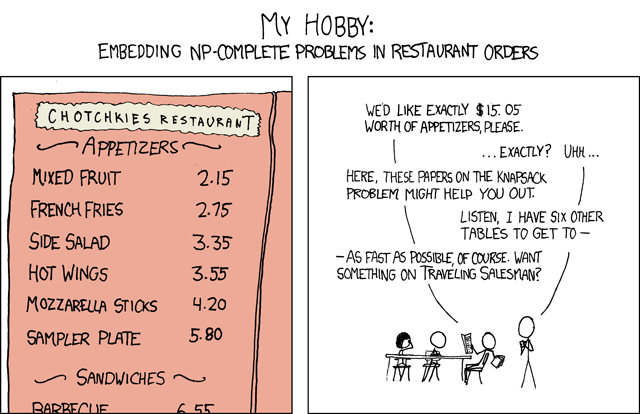

In [4]:
Image("https://imgs.xkcd.com/comics/np_complete.png")

In [65]:
a,b,c,d,e,f = Ints('a b c d e f')
s = Solver()
s.add(215*a + 275*b + 335*c + 355*d + 420*e + 580*f == 1505, a>=0, b>=0, c>=0, d>=0, e>=0, f>=0)

s.check(), s.model()

(sat, [d = 0, e = 0, a = 7, f = 0, b = 0, c = 0])

How to find all solutions? 

In [79]:
a,b,c,d,e,f = Ints('a b c d e f')
s = Solver()
s.add(215*a + 275*b + 335*c + 355*d + 420*e + 580*f == 1505, a>=0, b>=0, c>=0, d>=0, e>=0, f>=0)

results=[]


# enumerate all possible solutions:
while True:
    if s.check() == sat:
        m = s.model()
        print(m)
        results.append(m)
        block = []
        for d in m:
            c=d()  ### Why is this needed?
            block.append(c != m[d])
        s.add(Or(block))
    else:
        print ("results total=", len(results))
        break


[d = 0, e = 0, c = 0, f = 0, b = 0, a = 7]
[d = 2, a = 1, b = 0, f = 1, e = 0, c = 0]
results total= 2


## Integer Linear Programming



We have a lot of $6 \times 13$ rectangles, we want to get 800 rectangles $4 \times 5$ and 200 of $2 \times 3$. How to do it best?

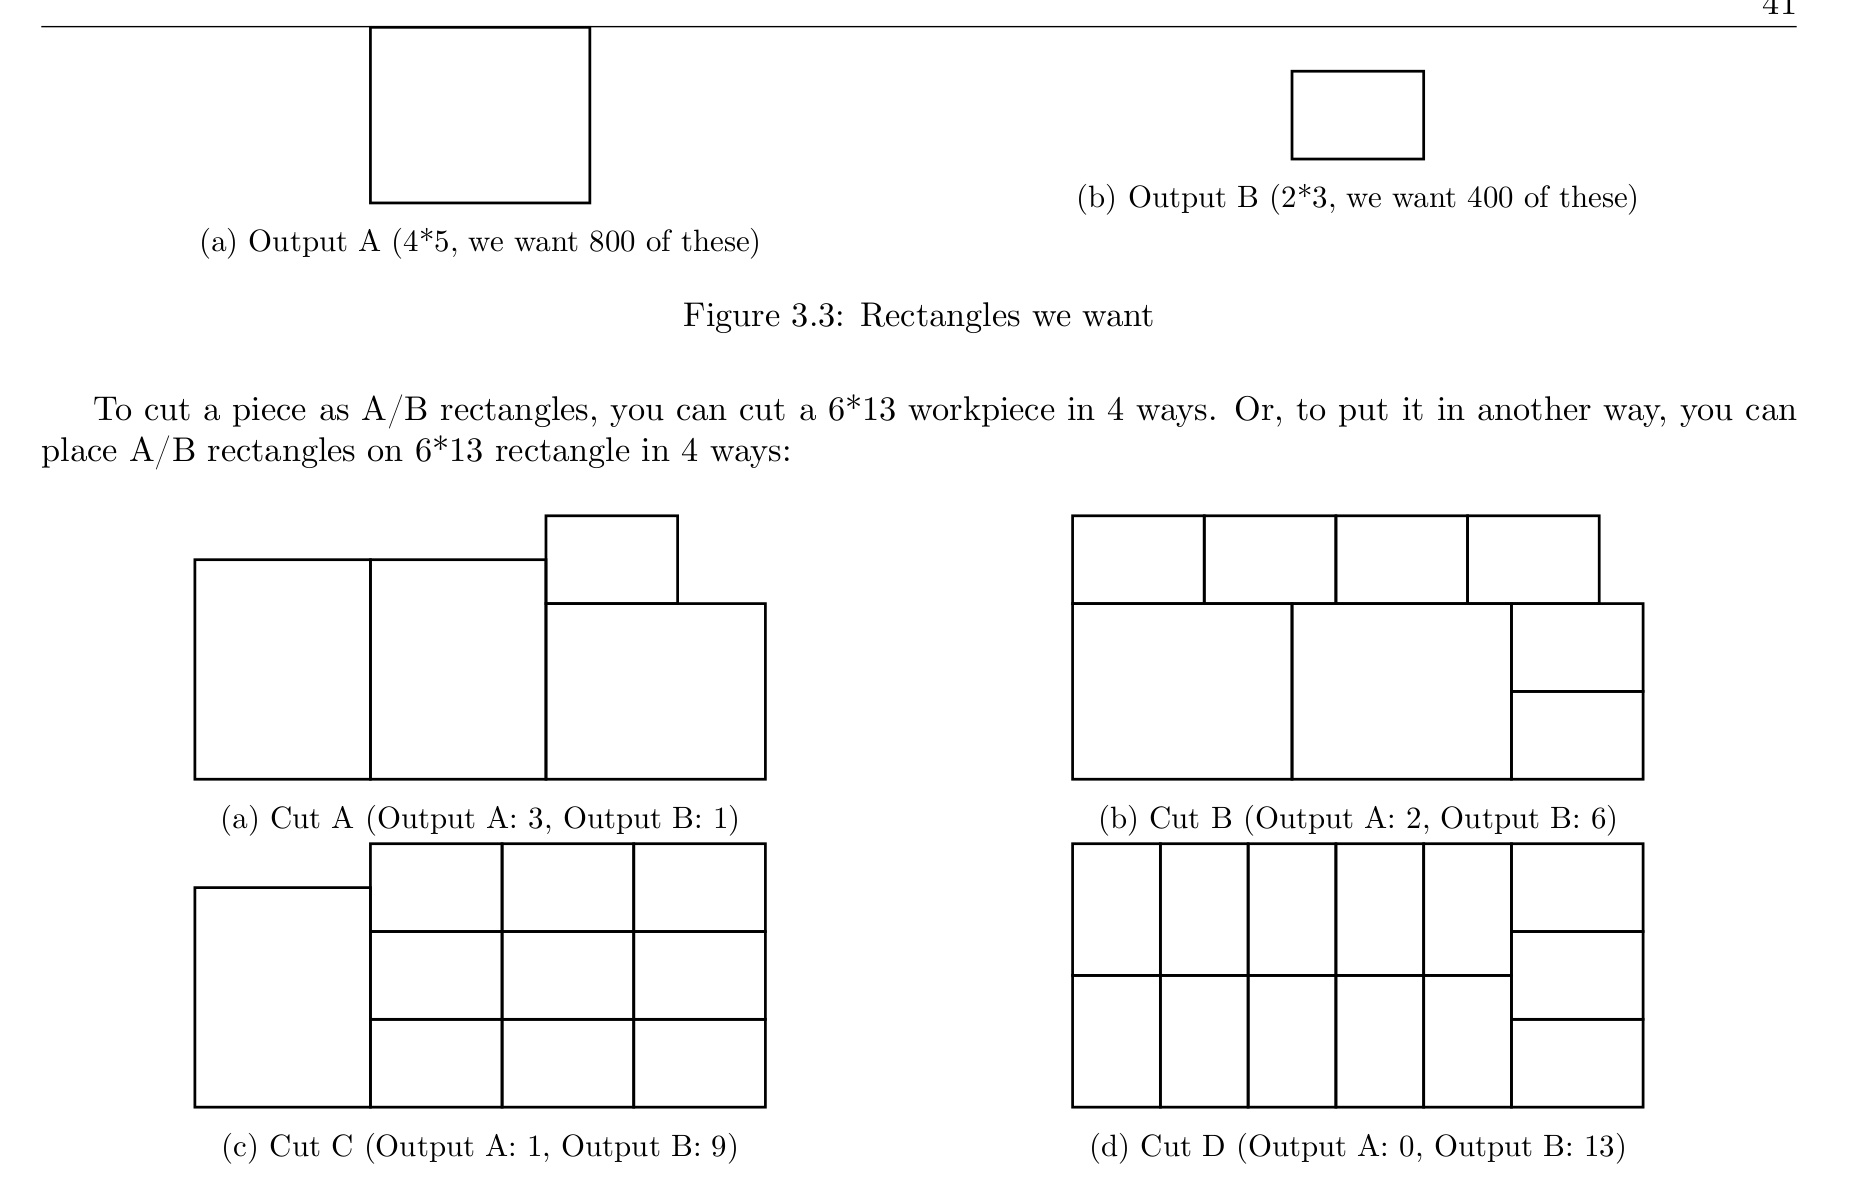

In [127]:
Image("img/cutting.png")

In [82]:
s = Optimize()   ## different object than Solver() !
workpieces_total = Int('workpieces_total')
cut_A, cut_B, cut_C, cut_D = Ints('cut_A cut_B cut_C cut_D')
out_A, out_B = Ints('out_A out_B')
s.add( workpieces_total == cut_A + cut_B + cut_C +cut_D )
s.add(cut_A >=0)
s.add(cut_B >=0)
s.add(cut_C >=0)
s.add(cut_D >=0)
s.add(out_A == cut_A *3 + cut_B *2 + cut_C *1)
s.add(out_B == cut_A *1 + cut_B *6 + cut_C *9 + cut_D *13)
s.add(out_A >=800)
s.add(out_B >=400)
s.minimize(workpieces_total )
print(s.check())
print(s.model())

sat
[workpieces_total = 275,
 cut_B = 25,
 cut_D = 0,
 cut_C = 0,
 out_B = 400,
 out_A = 800,
 cut_A = 250]


## Subset sum

In computer science, the subset sum problem is an important problem in complexity theory and
cryptography. The problem is this: given a set (or multiset) of integers, is there a non-empty subset
whose sum is zero? For example, given the set $\{−7, −3, −2, 5, 8\}$, the answer is yes because the subset
$\{−3, −2, 5\}$ sums to zero.

In [3]:
set = [-7, -3, -2, 5, 8]
set_len = len(set)
vars = [Int('vars_%d' % i) for i in range(set_len)]
s = Solver()
rt = []
for i in range (set_len):
    rt.append(vars[i]*set[i])
    s.add(Or(vars[i]==0, vars[i]==1) ) # like bools

# rt here is [ vars_0 *-7, vars_1 *-3, vars_2 *-2, vars_3 *5, vars_4 *8]
s.add(sum(rt)==0)

s.check()
s.model()

[vars_0 = 0, vars_1 = 1, vars_2 = 1, vars_3 = 1, vars_4 = 0]

The obvious solution is the empty set. We must work harder to block this. 

In [4]:
s.assertions()

[Or(vars_0 == 0, vars_0 == 1),
 Or(vars_1 == 0, vars_1 == 1),
 Or(vars_2 == 0, vars_2 == 1),
 Or(vars_3 == 0, vars_3 == 1),
 Or(vars_4 == 0, vars_4 == 1),
 0 + vars_0*-7 + vars_1*-3 + vars_2*-2 + vars_3*5 + vars_4*8 ==
 0]

In [5]:
s.add(sum(vars) > 0)

In [6]:
s.assertions()

[Or(vars_0 == 0, vars_0 == 1),
 Or(vars_1 == 0, vars_1 == 1),
 Or(vars_2 == 0, vars_2 == 1),
 Or(vars_3 == 0, vars_3 == 1),
 Or(vars_4 == 0, vars_4 == 1),
 0 + vars_0*-7 + vars_1*-3 + vars_2*-2 + vars_3*5 + vars_4*8 ==
 0,
 0 + vars_0 + vars_1 + vars_2 + vars_3 + vars_4 > 0]

In [7]:
s.check(), s.model()

(sat, [vars_1 = 1, vars_4 = 0, vars_2 = 1, vars_3 = 1, vars_0 = 0])

In [8]:
s.add(vars[0] > 0)

In [9]:
s.check()

unsat

In [10]:
if s.check() == unsat:
    print("unsat")
else: 
    m = s.model()
    for i in range(set_len):
        if m[vars[i]] == 1:
            print(set[i], end=" ")


unsat


# Bithacks

## Weird xor

To compute a bitwise xor of two variable, you can use directly ``x^y`` in Python (or ``x^^y`` in Sage). 

Or you can get fancy and instead use ``((y & x)*0xFFFFFFFE ) + (y + x)``. 
This doesn't sound terribly useful (other bit-hacks are actually useful). Still, how can we verify if its true? 

We can think deeply about bit operations, or we can ask the computer (for 32-bit integers only).

In [11]:
x = BitVec('x', 32)
y = BitVec('y', 32)
output = BitVec('output', 32)
s = Solver()
s.add(x^y == output)
s.add(((y & x)*0xFFFFFFFE ) + (y + x) != output )
s.check()

unsat

In [12]:
x = BitVec('x', 32)
y = BitVec('y', 32)
prove(x^y ==  ( ((y & x)*0xFFFFFFFE ) + (y + x) ) )

proved


## Power of two test

How to test fast, whether a given integer is a power of two?
After a bit of thinking, ``x & (x-1)`` seems like the right test. 

Let us see:


In [13]:
x = BitVec('x', 4)
prove( (x & (x-1) == 0) == Or([x == t for t in [1,2,4,8]]))

counterexample
[x = 0]


In [14]:
x = BitVec('x', 4)
prove( And(x != 0, x & (x-1) == 0) == Or([x == t for t in [1,2,4,8]]))

proved


In [17]:
def is_power_of_two(x):
    return And(x != 0, 0 == (x & (x - 1)))

x = BitVec('x', 64)
prove(is_power_of_two(x) == Or([x == 2**i for i in range(64)]))

proved


# More

## Minesweeper

You can solve Minesweeper game using Z3: see Chapter 3.10 of 
[this nice tutorial/book](https://smt.st/SAT_SMT_by_example.pdf). (Most of our examples are from that book.)

## More advanced syntax (functions, arrays, etc.) 

[See the official docs](https://microsoft.github.io/z3guide/)
Here just one appetizer.

In [18]:
S = DeclareSort('S')
f = Function('f', S, S)
x = Const('x', S)
solve(f(f(x)) == x, f(f(f(x))) == x)

[x = S!val!0, f = [else -> S!val!0]]


In [19]:
solve(f(f(x)) == x, f(f(f(x))) == x, f(x) != x)

no solution


# Problems for you to try

## Basics

* Exercise 9 from TAOCP “7.1.1 Boolean Basics”, solve it using
Z3

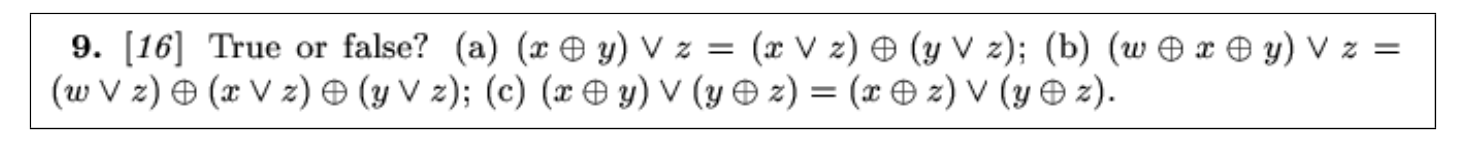

In [11]:
Image("img/SAT.png")

* Exercise 56 from TAOCP “7.1.1 Boolean Basics”. Solve it using
Z3

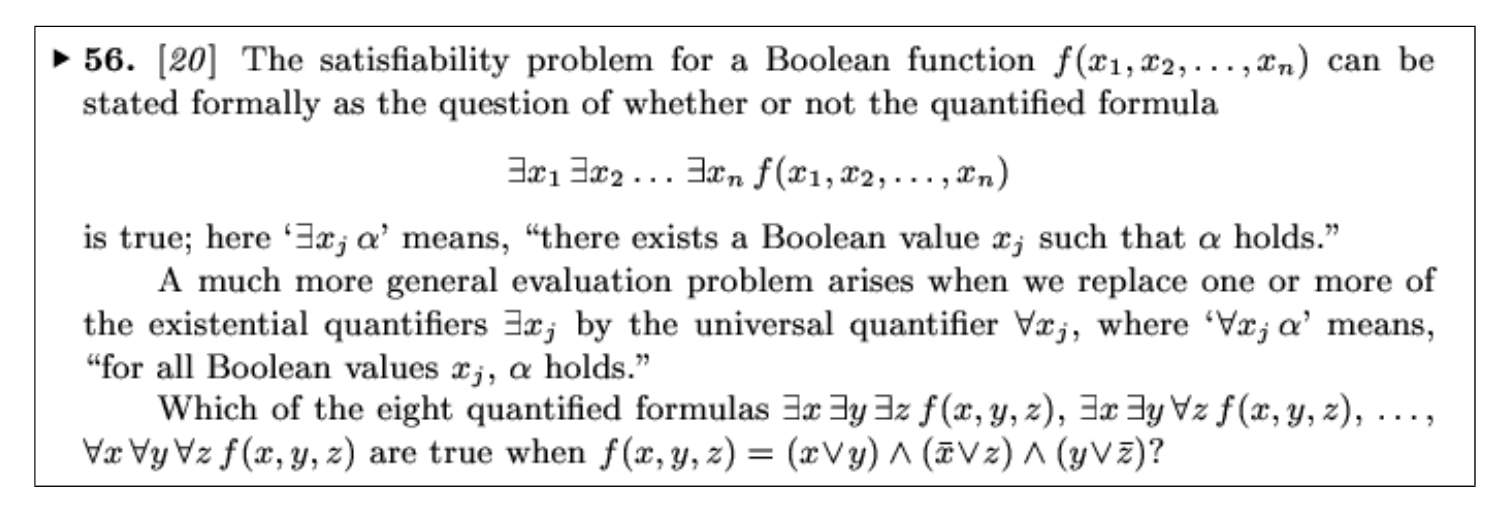

In [12]:
Image("img/quantifiers.png")

* Modify tha "Knapsack" illustration for a [true Knapsack](https://en.wikipedia.org/wiki/Knapsack_problem). Say, in the following form: we want to maximize the number of appetizers, while keeping the price below \\$15.05.

* Pablo buys popsicles for his friends. The store sells single popsicles for \\$1 each, 3-popsicle boxes
for \\$2, and 5-popsicle boxes for \\$3. What is the greatest number of popsicles that Pablo can buy with
\\$8?

* Solve the following [Coin sums problem](https://projecteuler.net/problem=31)

## Bithacks

* Find whether the weird bithack for xor works also for 64-bit integers.

* Verify that the following does proper bit reverse. (See also [linux source code](https://github.com/torvalds/linux/blob/master/include/linux/bitrev.h) .) That is, show that ``bitrev64`` and ``bitrev64_unoptimized`` does the same thing.

In [38]:

# from Henry Warren's "Hacker's Delight", Chapter 7
# Or: https://github.com/torvalds/linux/blob/master/include/linux/bitrev.h

# default right shift in Z3 is arithmetical, so I'm using Z3's LShR() function here, which is logical shift right

def bitrev8(x):
    x = LShR(x, 4) | (x << 4)
    x = LShR(x & 0xCC, 2) | ((x & 0x33) << 2)
    x = LShR(x & 0xAA, 1) | ((x & 0x55) << 1)
    return x

# these "unoptimized" versions are constructed like a Russian doll...

def bitrev16_unoptimized(x):
    return (bitrev8(x & 0xff) << 8) | (bitrev8(LShR(x, 8)))

def bitrev32_unoptimized(x):
    return (bitrev16_unoptimized(x & 0xffff) << 16) | (bitrev16_unoptimized(LShR(x, 16)))

def bitrev32(x):
    x = LShR(x, 16) | (x << 16)
    x = LShR(x & 0xFF00FF00, 8) | ((x & 0x00FF00FF) << 8)
    x = LShR(x & 0xF0F0F0F0, 4) | ((x & 0x0F0F0F0F) << 4)
    x = LShR(x & 0xCCCCCCCC, 2) | ((x & 0x33333333) << 2)
    x = LShR(x & 0xAAAAAAAA, 1) | ((x & 0x55555555) << 1)
    return x

def bitrev64_unoptimized(x):
    # both versions must work:
    return (bitrev32_unoptimized(x & 0xffffffff) << 32) | bitrev32_unoptimized(LShR(x, 32))
    #return (bitrev32(x & 0xffffffff) << 32) | bitrev32(LShR(x, 32))

# copypasted from CADO-NFS 2.3.0, http://cado-nfs.gforge.inria.fr/download.html
def bitrev64 (a):
    a = LShR(a, 32) ^ (a << 32)
    m = 0x0000ffff0000ffff
    a = (LShR(a, 16) & m) ^ ((a << 16) & ~m)
    m = 0x00ff00ff00ff00ff
    a = (LShR(a, 8) & m) ^ ((a << 8) & ~m)
    m = 0x0f0f0f0f0f0f0f0f
    a = (LShR(a, 4) & m) ^ ((a << 4) & ~m)
    m = 0x3333333333333333
    a = (LShR(a, 2) & m) ^ ((a << 2) & ~m)
    m = 0x5555555555555555
    a = (LShR(a, 1) & m) ^ ((a << 1) & ~m)
    return a

* Guess what the following function does. Verify that it really works (using z3, for a and b 32-bit, or 64-bit integers).

In [100]:
def func(a,b):
    return ((a^b) >>1) + (a&b)

## Graphs

* Find independent sets using z3. (Compare correctness and timing with the sage implementation.)

* Color graphs using z3. (Again, compare.)

* Use z3 to find Ramsey graphs: a graph on $n$ vertices that does not have clique of size $k$ nor independent set of size $l$. For starters try $n = 5$ and $k=l=3$ (you should get a $C_5$). Getting the graph with $n=17$ and $k=l=4$ is still very fast. If you feel adventurous, try to improve the state-of-the-art (like finding a graph with $n=43$ and $k=l=5$). 

* Can you use z3 to find Hamiltonian cycles?

## Misc

* Is there function $f$ such that $f(f(f(f(f(x))))) = x$, $f(f(f(x))) = x$ but $f(x) \ne x$?

* Place $n$ queens on $n \times n$ chessboard! 

# Comments & solutions

``Xor`` is a function that does what you expect -- but only for two inputs!!

In [30]:
x,y,z,w = Bools('x y z w')
prove( Xor(x,y) == Not(x==y) )

proved


In [23]:
prove( Xor( Xor(x,y), z) == Xor(x, Xor(y,z)))

proved


In [24]:
prove( Xor( Xor(x,y), z) == Xor(x,y,z))

counterexample
[z = True, y = False, x = True]


In [29]:
prove( Or( Xor(x,y), z) == Xor( Or(x,z), Or(y,z)))

counterexample
[z = True, y = False, x = False]


In [31]:
prove( Or( Xor(Xor(x,y),w), z) == Xor( Xor(Or(x,z), Or(y,z)), Or(w,z)) )

proved


## Coins

This takes a while for 200, perhaps run it first for 20 or 50 cents. 
Or you can solve it using generating functions (using Sage, product of functions $1/(1-x^k)$ where $k$ is one of the coin values, and ``.taylor()`` function).

In [43]:
from z3 import *

In [50]:
L = [1,2,5,10,20,50,100,200]

s = Solver()

vars = [Int('vars_%d' % i) for i in range(len(L))]
rt = []
for i in range(len(L)):
    rt.append(vars[i]*L[i])
    s.add(vars[i]>=0 )

s.add( sum(rt) == 200)

results = []

In [51]:
# enumerate all possible solutions:
while True:
    if s.check() == sat:
        m = s.model()
        #print(m)
        results.append(m)
        block = []
        for d in m:
            c=d()  ### Why is this needed?
            block.append(c != m[d])
        s.add(Or(block))
    else:
        print ("results total=", len(results))
        break


results total= 4563
